In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/used-cars-price-prediction/train-data.csv')
df_test = pd.read_csv('../input/used-cars-price-prediction/test-data.csv')

In [3]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

In [4]:
print("Skew ", df_train['Price'].skew())
print("kurt ", df_train['Price'].kurt())

Skew  3.3352319876668415
kurt  17.09220197043644


In [5]:
#A trial to check log of target label to avoid skew & kurt
df_test1 = np.log1p(df_train['Price'].values)

In [6]:
df_test1 = df_test1.reshape(-1,1)
df_test1 = pd.DataFrame(df_test1, columns=['PriceNew'])

In [7]:
print("Skew ", df_test1['PriceNew'].skew())
print("kurt ", df_test1['PriceNew'].kurt())

Skew  0.7543716000992179
kurt  0.31018039291429167


In [8]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
df_test.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
442,442,Audi A4 2.0 TDI,Delhi,2012,70000,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN
174,174,Skoda Laura 1.9 TDI MT Elegance,Pune,2007,124298,Diesel,Manual,Second,17.0 kmpl,1896 CC,105 bhp,5.0,NaN
790,790,Volvo S80 D5,Delhi,2011,87000,Diesel,Automatic,Second,13.1 kmpl,2400 CC,215 bhp,5.0,NaN
411,411,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,Hyderabad,2015,134000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN
933,933,Honda Amaze VX CVT i-VTEC,Jaipur,2017,145000,Petrol,Automatic,First,18.1 kmpl,1199 CC,88.7 bhp,5.0,NaN


In [10]:
print(df_train.shape)
print(df_test.shape)

(6019, 14)
(1234, 13)


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
Unnamed: 0           1234 non-null int64
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [12]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


1. Price column have outliers

In [13]:
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


1. New_Price have more than 86% missing need to address, this column seems important to compare price between new car & used car price.
2. Mileage, Engine, Power, Seats have very few missing this can be addressed by filling mean, median or mode to avoid lossing data

In [14]:
miss_percent = (df_test.isnull().sum() / len(df_test)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_test.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,85.251216,1052
Seats,0.891410,11
Engine,0.810373,10
Power,0.810373,10


In [15]:
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)

1. dropped the unnamed index column

In [16]:
df_train['brand_name'] = df_train['Name'].apply(lambda x: str(x).split(" ")[0])
df_test['brand_name'] = df_test['Name'].apply(lambda x: str(x).split(" ")[0])

1. created a new column as 'brand_name'

In [17]:
df_train.drop(columns=["Name"], axis=1, inplace=True)
df_test.drop(columns=["Name"], axis=1, inplace=True)

1. Dropped the 'Name' column from both train & test data

In [18]:
#df_train.loc[df_train['brand_name'] == 'Maruti']['Seats'].mode()[0]
def fill_na_with_mode(ds, brandname):
  fill_value = ds.loc[ds['brand_name'] == brandname]['Seats'].mode()[0]
  condit = ((ds['brand_name'] == brandname) & (ds['Seats'].isnull()))
  ds.loc[condit, 'Seats'] = ds.loc[condit, 'Seats'].fillna(fill_value)

In [19]:
car_brand = ['Maruti','Hyundai','BMW','Fiat','Land','Ford','Toyota','Honda','Skoda','Mahindra']
for c in car_brand:
  fill_na_with_mode(df_train, c)
  fill_na_with_mode(df_test, c)

1. Replaced all missing values in seats with mode of the specified brand name

In [20]:
import re

df_train['Mileage_upd'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_train['Engine_upd'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Power_upd'] = df_train['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

df_test['Mileage_upd'] = df_test['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_test['Engine_upd'] = df_test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_test['Power_upd'] = df_test['Power'].apply(lambda x: re.sub(r'(\d+\.?\d+?)\s(bhp)', r'\1', str(x)))

1. Removed the km/kg & km/l from mileage to make as numeric column
2. removed the 'CC' and 'bhp' from engine & power columns to change as numeric

In [21]:
df_train['Mileage_upd'] = pd.to_numeric(df_train['Mileage_upd'], errors='coerce')
df_train['Engine_upd'] = pd.to_numeric(df_train['Engine_upd'], errors='coerce')
df_train['Power_upd'] = pd.to_numeric(df_train['Power_upd'], errors='coerce')

df_test['Mileage_upd'] = pd.to_numeric(df_test['Mileage_upd'], errors='coerce')
df_test['Engine_upd'] = pd.to_numeric(df_test['Engine_upd'], errors='coerce')
df_test['Power_upd'] = pd.to_numeric(df_test['Power_upd'], errors='coerce')

1. converted the 3 columns to float

In [22]:
df_train.drop(columns=['Mileage', 'Engine', 'Power'], inplace=True)
df_test.drop(columns=['Mileage', 'Engine', 'Power'], inplace=True)

1. Removed the mileage,engine,power columns with updated columns

In [23]:
df_train.drop(df_train[df_train['brand_name'] == 'Smart'].index, axis=0, inplace=True)
df_test.drop(df_test[df_test['brand_name'] == 'Hindustan'].index, axis=0, inplace=True)

1. Removed 1 row with unique brand having null value for Power.

In [24]:
#Function to replace na value with mode of that specific brand
def fill_na_with_mode(ds, brandname, colname):
  fill_value = ds.loc[ds['brand_name'] == brandname][colname].mode()[0]
  condit = ((ds['brand_name'] == brandname) & (ds[colname].isnull()))
  ds.loc[condit, colname] = ds.loc[condit, colname].fillna(fill_value)

In [25]:
miss_Mileage_col = df_train.loc[df_train['Mileage_upd'].isnull()]['brand_name'].unique()
miss_Engine_col = df_train.loc[df_train['Engine_upd'].isnull()]['brand_name'].unique()
miss_Power_col = df_train.loc[df_train['Power_upd'].isnull()]['brand_name'].unique()

for x in miss_Mileage_col:
  fill_na_with_mode(df_train, x, 'Mileage_upd')
for y in miss_Engine_col:
  fill_na_with_mode(df_train, y, 'Engine_upd')
for z in miss_Power_col:
  fill_na_with_mode(df_train, z, 'Power_upd')

In [26]:
miss_ts_Mileage_col = df_test.loc[df_test['Mileage_upd'].isnull()]['brand_name'].unique()
miss_ts_Engine_col = df_test.loc[df_test['Engine_upd'].isnull()]['brand_name'].unique()
miss_ts_Power_col = df_test.loc[df_test['Power_upd'].isnull()]['brand_name'].unique()

for x in miss_ts_Mileage_col:
  fill_na_with_mode(df_test, x, 'Mileage_upd')
for y in miss_ts_Engine_col:
  fill_na_with_mode(df_test, y, 'Engine_upd')
for z in miss_ts_Power_col:
  fill_na_with_mode(df_test, z, 'Power_upd')

In [27]:
zero_mileage_col = df_train.loc[df_train['Mileage_upd'] == 0.0]['brand_name'].unique()

for m in zero_mileage_col:
  fill_zero = df_train.loc[df_train['brand_name'] == m]['Mileage_upd'].mode()[0]
  m1 = ((df_train['brand_name'] == m) & (df_train['Mileage_upd'] == 0.0))
  df_train.loc[m1, 'Mileage_upd'] = fill_zero

In [28]:
zero_mileage_col2 = df_test.loc[df_test['Mileage_upd'] == 0.0]['brand_name'].unique()

for m in zero_mileage_col2:
  fill_zero = df_test.loc[df_test['brand_name'] == m]['Mileage_upd'].mode()[0]
  m1 = ((df_test['brand_name'] == m) & (df_test['Mileage_upd'] == 0.0))
  df_test.loc[m1, 'Mileage_upd'] = fill_zero

1. Replaced 0.0 values with mode for column Mileage_upd

In [29]:
m1 = (df_train['Seats'] == 0.0)
df_train.loc[m1, 'Seats'] = 5.0

1. Replaced 1 zero value of seats with 5.0

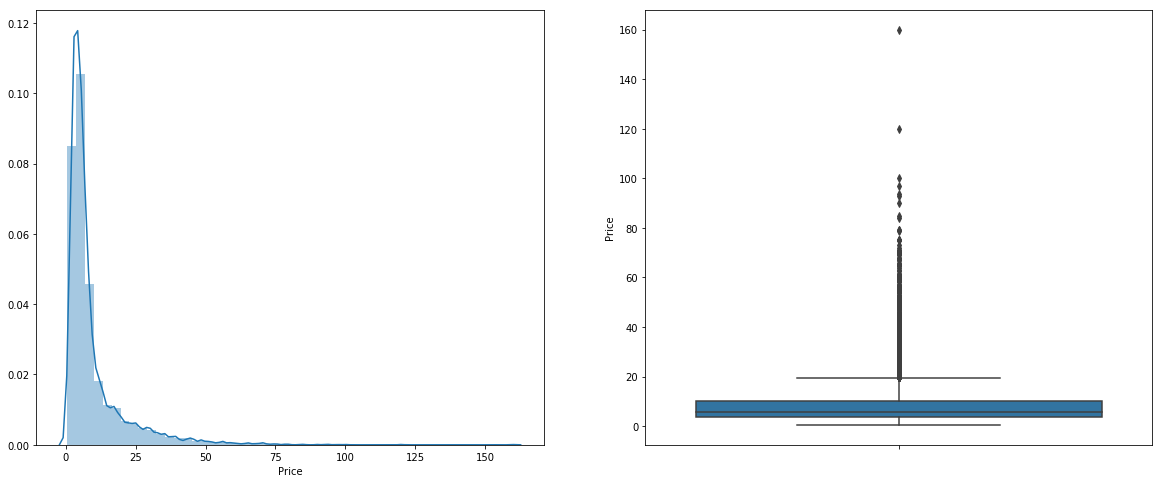

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_train['Price'])

plt.subplot(1,2,2)
sns.boxplot(y=df_train['Price'])
plt.show()

1. Price column squweed in right, so label is not properly distributed

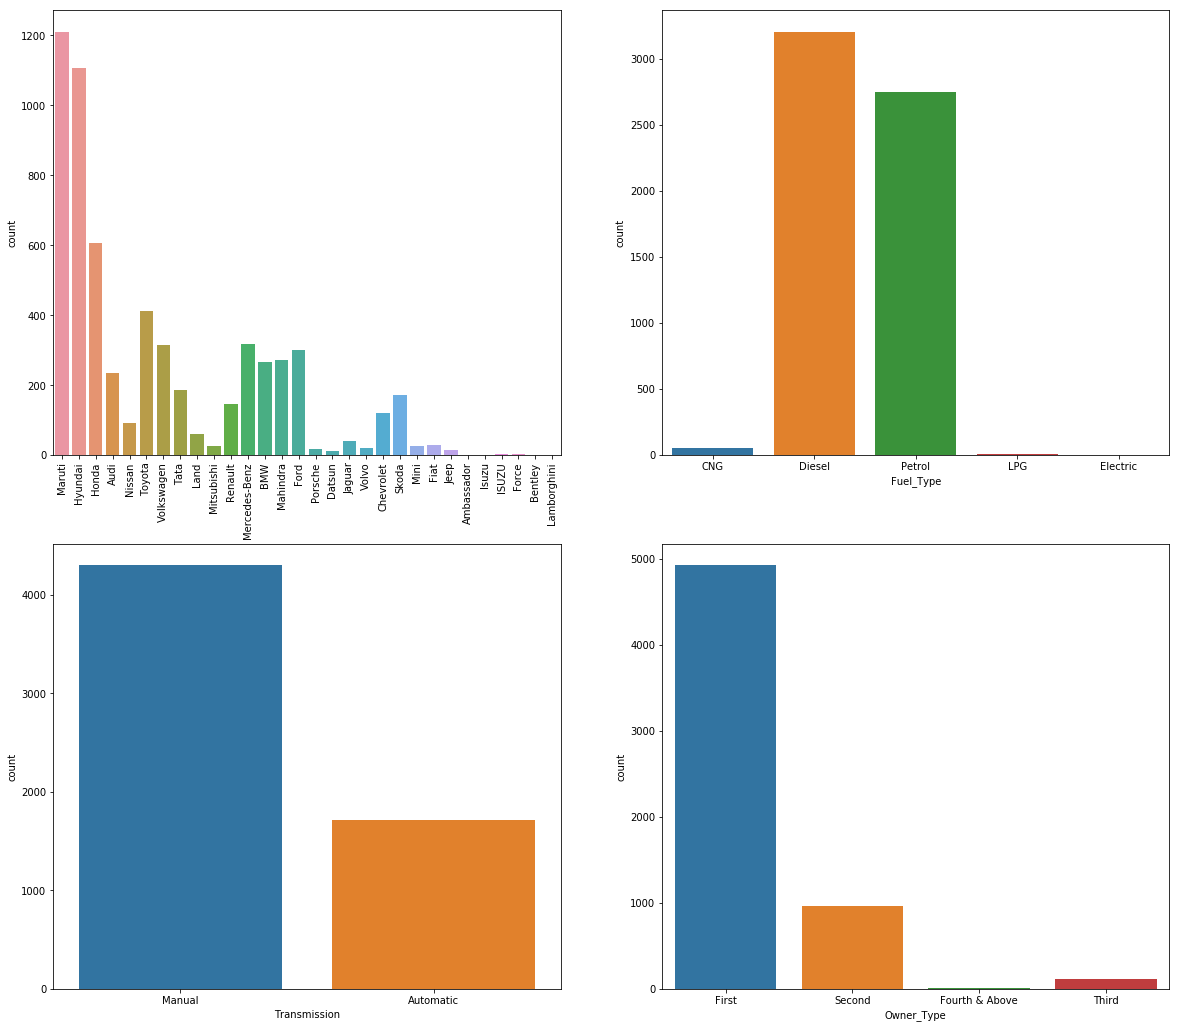

In [31]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='brand_name', data=df_train)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)
fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=df_train)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='Transmission', data=df_train)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=df_train)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()

1. Maruti is leading car brand, fueltype both diesel & petrol are almost equal
2. Manual gear transmission is high, First owernership is high, also have second

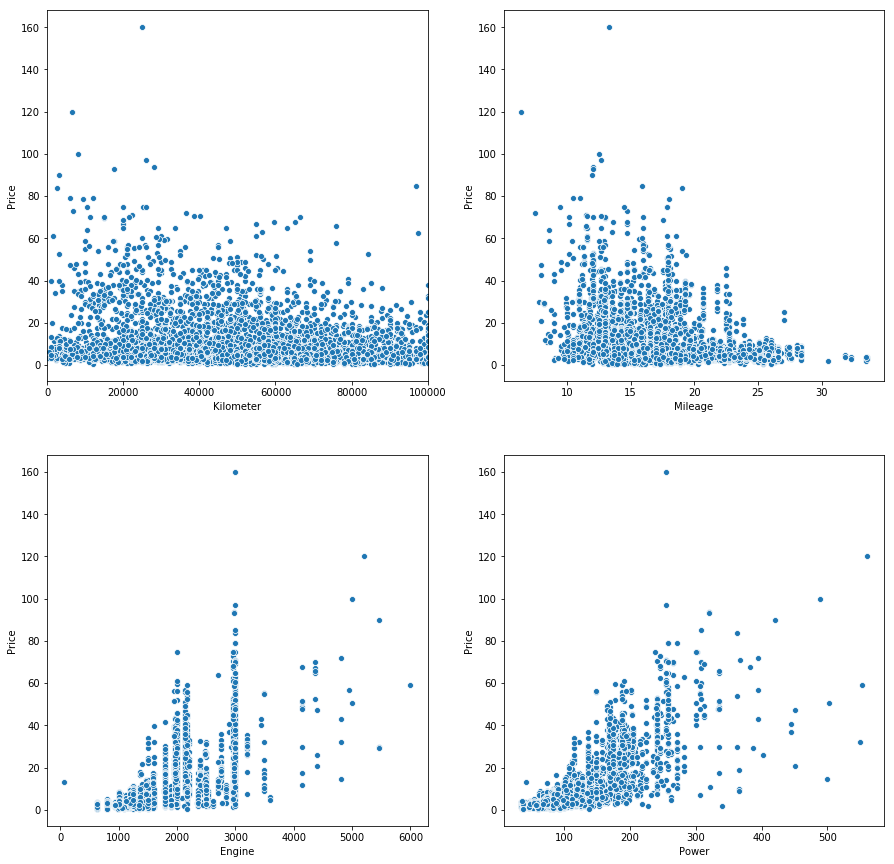

In [32]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=df_train)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

ax2 = fig.add_subplot(2,2,2)
#plt.xlim([0, 100000])
p2 = sns.scatterplot(x="Mileage_upd", y="Price", data=df_train)
loc, labels = plt.xticks()
ax2.set_xlabel('Mileage')

ax3 = fig.add_subplot(2,2,3)
#plt.xlim([0, 100000])
p3 = sns.scatterplot(x="Engine_upd", y="Price", data=df_train)
loc, labels = plt.xticks()
ax3.set_xlabel('Engine')

ax4 = fig.add_subplot(2,2,4)
#plt.xlim([0, 100000])
p4 = sns.scatterplot(x="Power_upd", y="Price", data=df_train)
loc, labels = plt.xticks()
ax4.set_xlabel('Power')

plt.show()

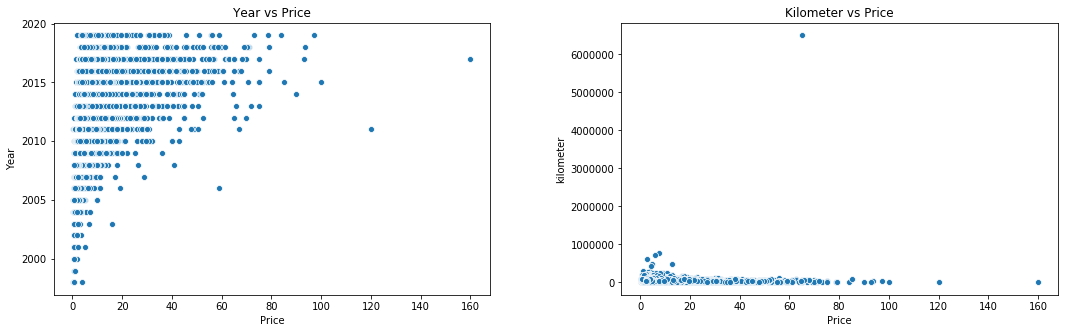

In [33]:
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(x='Price', y="Year", data=df_train)
ax1.set_xlabel('Price')
ax1.set_ylabel('Year')
ax1.set_title('Year vs Price')

ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(x='Price', y='Kilometers_Driven', data=df_train)
ax2.set_ylabel('kilometer')
ax2.set_xlabel('Price')
ax2.set_title('Kilometer vs Price')
plt.show()

In [34]:
df_train.drop(df_train[df_train['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

1. deleted a outlier row from training data.

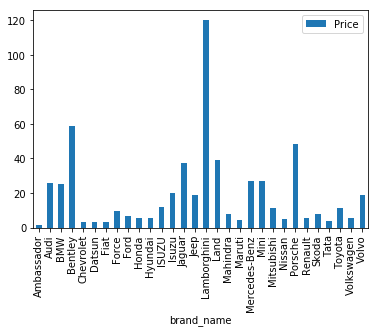

In [35]:
df_vis_1 = pd.DataFrame(df_train.groupby('brand_name')['Price'].mean())
df_vis_1.plot.bar()
plt.show()

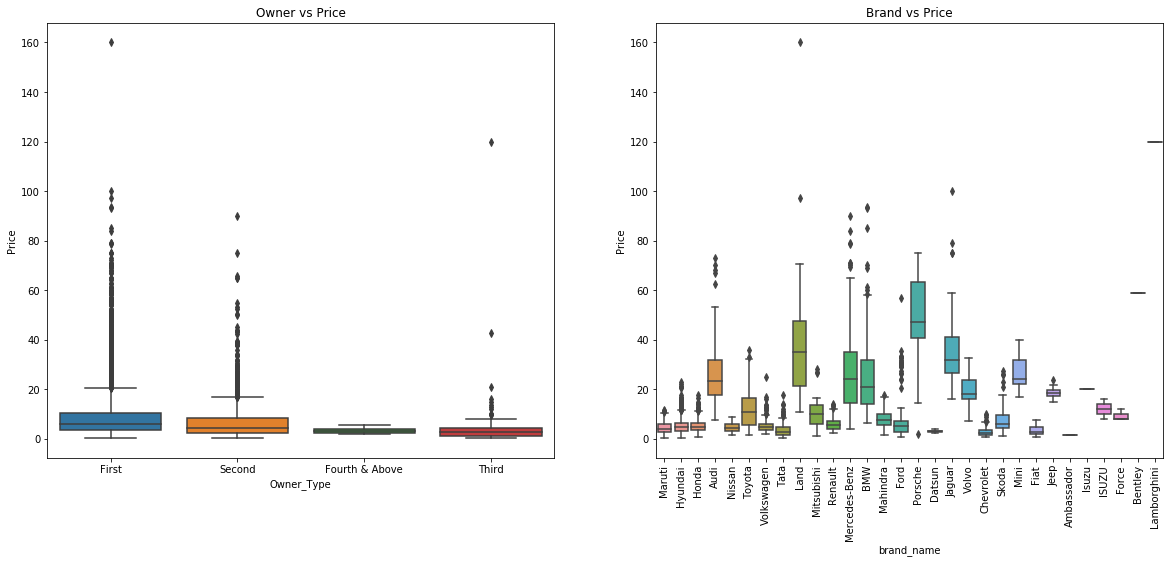

In [36]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Owner_Type', y='Price', data=df_train)
ax1.set_title('Owner vs Price')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='brand_name', y='Price', data=df_train)
loc,labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=90)
ax2.set_title('Brand vs Price')
plt.show()

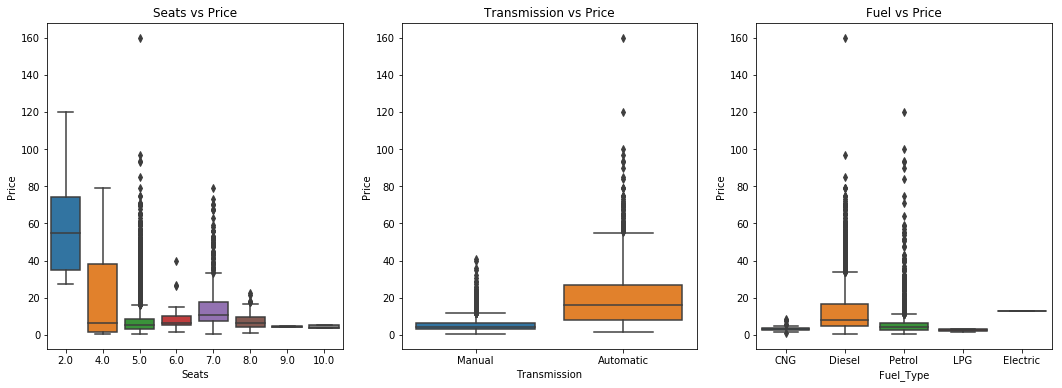

In [37]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='Seats', y='Price', data=df_train)
ax1.set_title('Seats vs Price')

ax2 = fig.add_subplot(1,3,2)
sns.boxplot(x='Transmission', y='Price', data=df_train)
ax2.set_title('Transmission vs Price')

ax3 = fig.add_subplot(1,3,3)
sns.boxplot(x='Fuel_Type', y='Price', data=df_train)
ax3.set_title('Fuel vs Price')

plt.show()

In [38]:
import datetime
now = datetime.datetime.now()
df_train['Year_upd'] = df_train['Year'].apply(lambda x : now.year - x)
df_test['Year_upd'] = df_test['Year'].apply(lambda x : now.year - x)

1. Added new column by getting the year count when it is bought

In [39]:
df_train.drop(columns=['Year'], axis=1, inplace=True)
df_test.drop(columns=['Year'], axis=1, inplace=True)

1. dropped the 'year' column

In [40]:
df_train.drop(columns=['New_Price'], axis=1, inplace=True)
df_test.drop(columns=['New_Price'], axis=1, inplace=True)

1. 'Newprice' column deleted having most null values, but need to input the price details in future to get better prediction [to do]

In [41]:
df_train.drop(columns=['Location'], axis=1, inplace=True)
df_test.drop(columns=['Location'], axis=1, inplace=True)

1. 'Location' column not needed for price prediction.

In [42]:
df_train_norm = pd.get_dummies(df_train, drop_first=True)
df_test_norm = pd.get_dummies(df_test, drop_first=True)

1. Changed categorical variables to numerical data the both training and test set

In [43]:
df_train_norm['Price_upd'] = np.log1p(df_train_norm['Price'].values)

1. add new column after taking logarithm for the dependent variable to avoid high skewness & kurtosis

In [44]:
df_train_norm.drop(columns=['Price'], axis=1, inplace=True)

In [45]:
df_train_X = df_train_norm.drop(columns=['Price_upd'], axis=1)
df_train_y = df_train_norm[['Price_upd']]

1. Seperated X & y values

In [46]:
df_train_X = (df_train_X - df_train_X.mean())/df_train_X.std()
df_test_norm = (df_test_norm - df_test_norm.mean())/df_test_norm.std()

1. Normalized the train and test data

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_y, test_size=0.22, random_state=1)
reg = lm.fit(X_train, y_train)

1. splitted train test split because test set dont have labels to verify accuracy

In [48]:
y_predict = reg.predict(X_test)
y_predict

array([[1.26552093],
       [1.60052778],
       [0.93832768],
       ...,
       [1.74871724],
       [2.08694159],
       [3.47966153]])

In [49]:
from sklearn.metrics import r2_score

r2_score(y_predict, y_test)

0.9055982110874199

In [50]:
reg.score(X_test,y_test)

0.9157487125391294

Thanks!